In [55]:
import json
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import mplhep as mh

from hist.hist import Hist
from hist.axis import Regular

In [56]:
def get_eff(path_tnp, path_geom, path_roll_blacklist, where="barrel"):
    '''
    load geometry from path
    '''
    geom = pd.read_csv(path_geom)


    '''
    load roll_blacklist from path
    '''
    with open(path_roll_blacklist) as stream:
        roll_blacklist = set(json.load(stream))


    '''
    load hist data from path
    '''
    h_total = uproot.open(f"{path_tnp}:total").to_hist()
    h_passed = uproot.open(f"{path_tnp}:passed").to_hist()

    total = h_total.values()
    passed = h_passed.values()

    eff = np.divide(passed, total, out=np.zeros_like(total), where=(total > 0))

    roll_axis = h_total.axes[0]
    roll_name_list = [roll_axis.value(idx) for idx in range(roll_axis.size)]

    is_barrel = np.vectorize(lambda item: item.startswith('W'))

    barrel_mask = is_barrel(roll_name_list)
    endcap_mask = np.logical_not(barrel_mask)

    is_whitelist = np.vectorize(lambda item: item not in roll_blacklist)
    whitelist_mask = is_whitelist(roll_name_list)

    '''
    select region from function arg: where
    '''
    if where == "barrel":
        eff = eff[barrel_mask & whitelist_mask] * 100
    if where == "endcap":
        eff = eff[endcap_mask & whitelist_mask] * 100
    if where == "total":
        eff = eff[whitelist_mask] * 100
    return eff


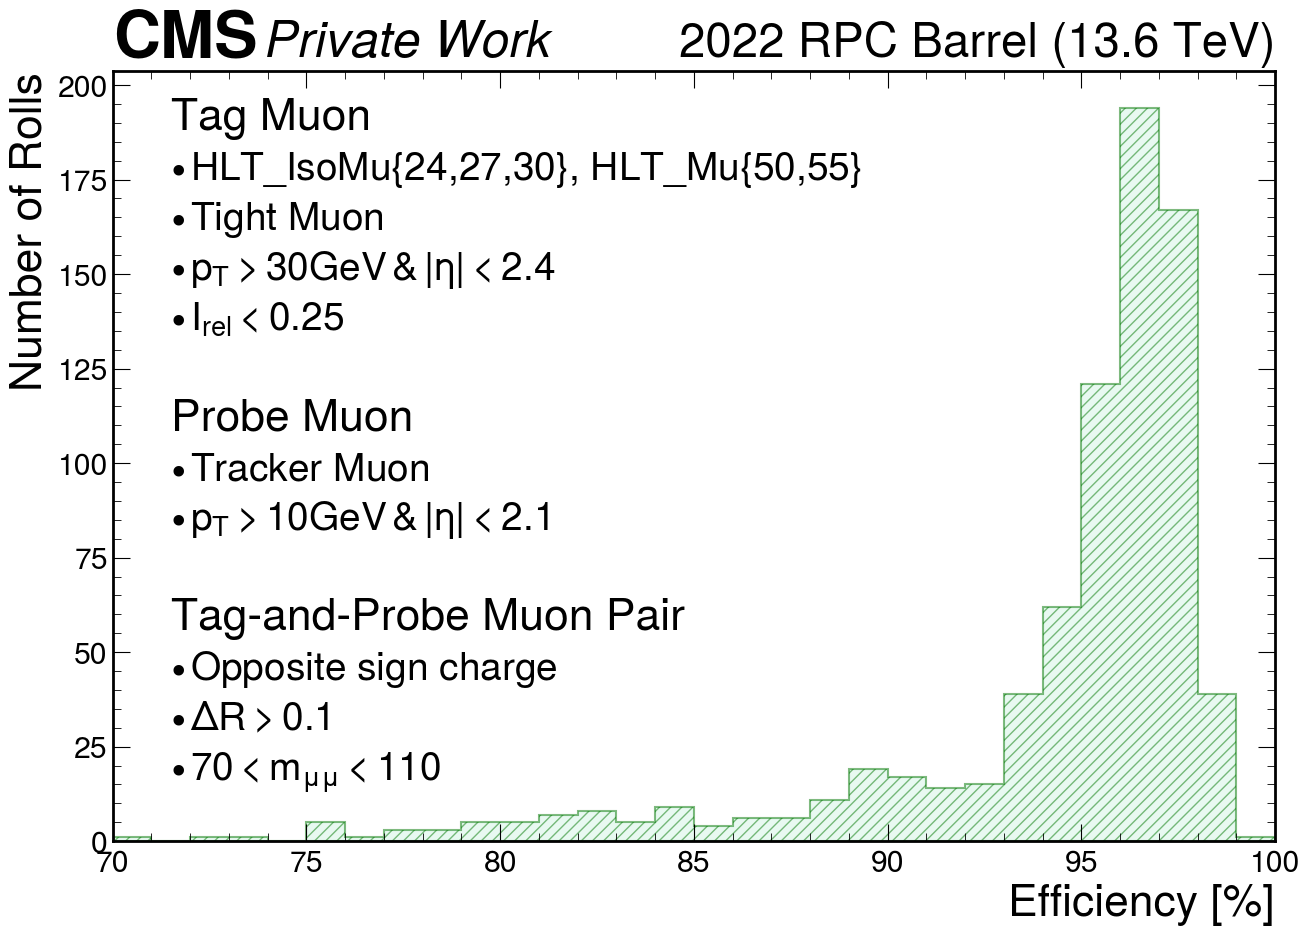

In [57]:
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2022 RPC Barrel", fontsize=36)

ax.set_xlabel('Efficiency [%]',  fontsize=32)
ax.set_ylabel('Number of Rolls', fontsize=32)
ax.set_xlim(70, 100)

x = 0.05
y0 = 0.925
dy = 0.065

ax.annotate(r'Tag Muon',                                           xy=(x, y0),         xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$HLT_IsoMu{24,27,30}, HLT_Mu{50,55}',     xy=(x, y0 - dy),    xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,$Tight Muon',                             xy=(x, y0 - 2*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>30GeV\,&\,|\eta|<2.4$',               xy=(x, y0 - 3*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,I_{rel}<0.25$',                           xy=(x, y0 - 4*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Probe Muon',                                         xy=(x, y0 - 6*dy),  xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Tracker Muon',                           xy=(x, y0 - 7*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>10GeV\,&\,|\eta|<2.1$',               xy=(x, y0 - 8*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Tag-and-Probe Muon Pair',                            xy=(x, y0 - 10*dy), xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Opposite sign charge',                   xy=(x, y0 - 11*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,{\Delta}R>0.1$',                          xy=(x, y0 - 12*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,70 < m_{\mu\mu} < 110$',                  xy=(x, y0 - 13*dy), xycoords='axes fraction', fontsize=28)

path_tnp = 'data/Run2022.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "barrel"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#d3f5e4"
edgecolor = "#007700"

h_eff[70j::10j].plot(
    ax = ax, yerr = False, histtype="fill",
    facecolor=facecolor, edgecolor=edgecolor,
    linewidth=1.5, alpha=0.5,
    flow=None, hatch="///"
)

fig.savefig("./plot/2022_barrel.pdf")
fig.savefig("./plot/2022_barrel.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


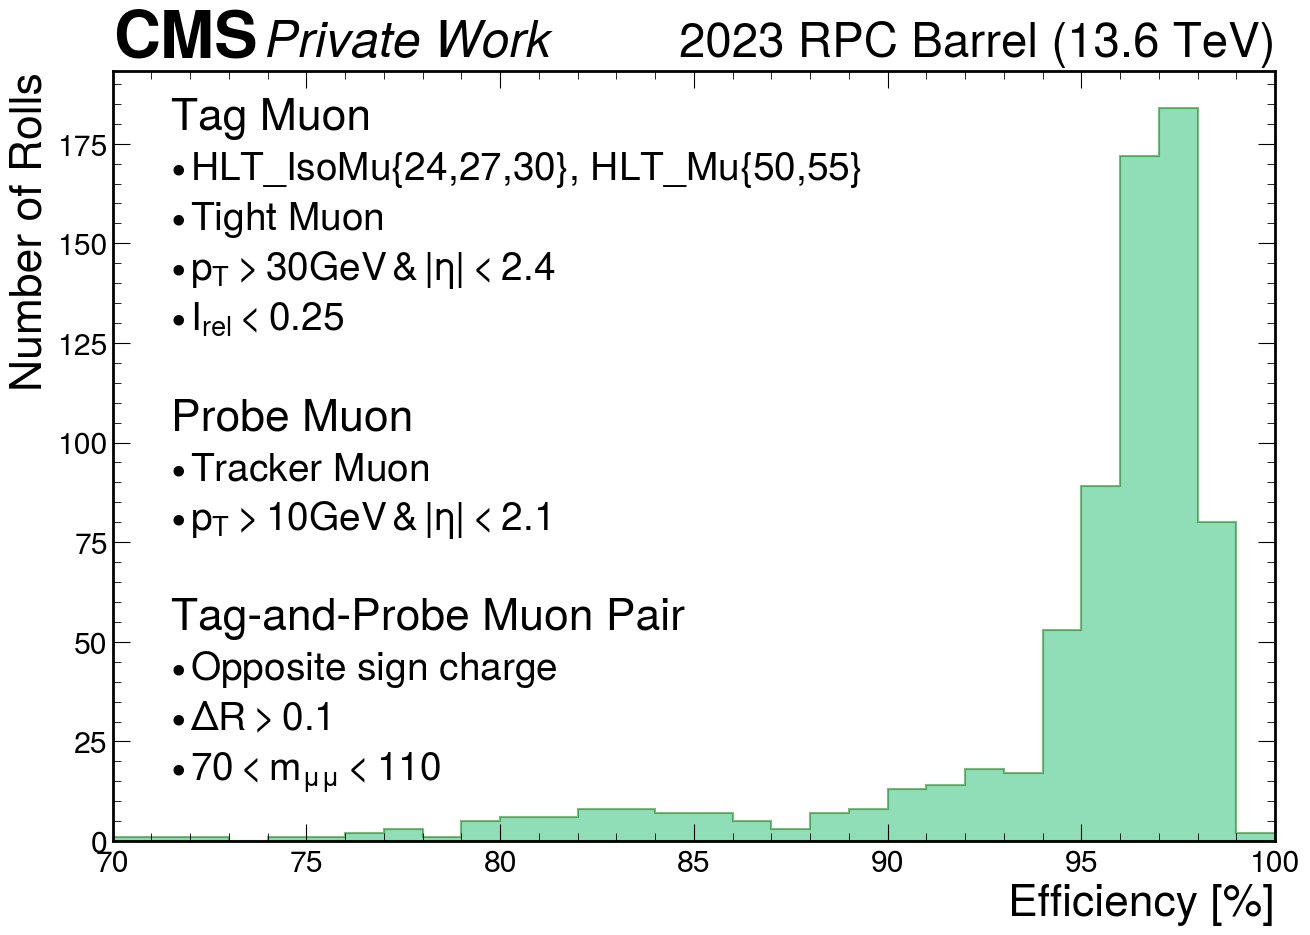

In [58]:
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2023 RPC Barrel", fontsize=36)

ax.set_xlabel('Efficiency [%]',  fontsize=32)
ax.set_ylabel('Number of Rolls', fontsize=32)
ax.set_xlim(70, 100)

x = 0.05
y0 = 0.925
dy = 0.065

ax.annotate(r'Tag Muon',                                           xy=(x, y0),         xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$HLT_IsoMu{24,27,30}, HLT_Mu{50,55}',     xy=(x, y0 - dy),    xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,$Tight Muon',                             xy=(x, y0 - 2*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>30GeV\,&\,|\eta|<2.4$',               xy=(x, y0 - 3*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,I_{rel}<0.25$',                           xy=(x, y0 - 4*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Probe Muon',                                         xy=(x, y0 - 6*dy),  xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Tracker Muon',                           xy=(x, y0 - 7*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>10GeV\,&\,|\eta|<2.1$',               xy=(x, y0 - 8*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Tag-and-Probe Muon Pair',                            xy=(x, y0 - 10*dy), xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Opposite sign charge',                   xy=(x, y0 - 11*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,{\Delta}R>0.1$',                          xy=(x, y0 - 12*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,70 < m_{\mu\mu} < 110$',                  xy=(x, y0 - 13*dy), xycoords='axes fraction', fontsize=28)

path_tnp = 'data/Run2023.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "barrel"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#21bf70"
edgecolor = "#007700"

h_eff[70j::10j].plot(
    ax = ax, yerr = False, histtype="fill",
    facecolor=facecolor, edgecolor=edgecolor,
    linewidth=1.5, alpha=0.5,
    flow=None,
)

ax.legend(fontsize="26")
fig.savefig("./plot/2023_barrel.pdf")
fig.savefig("./plot/2023_barrel.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


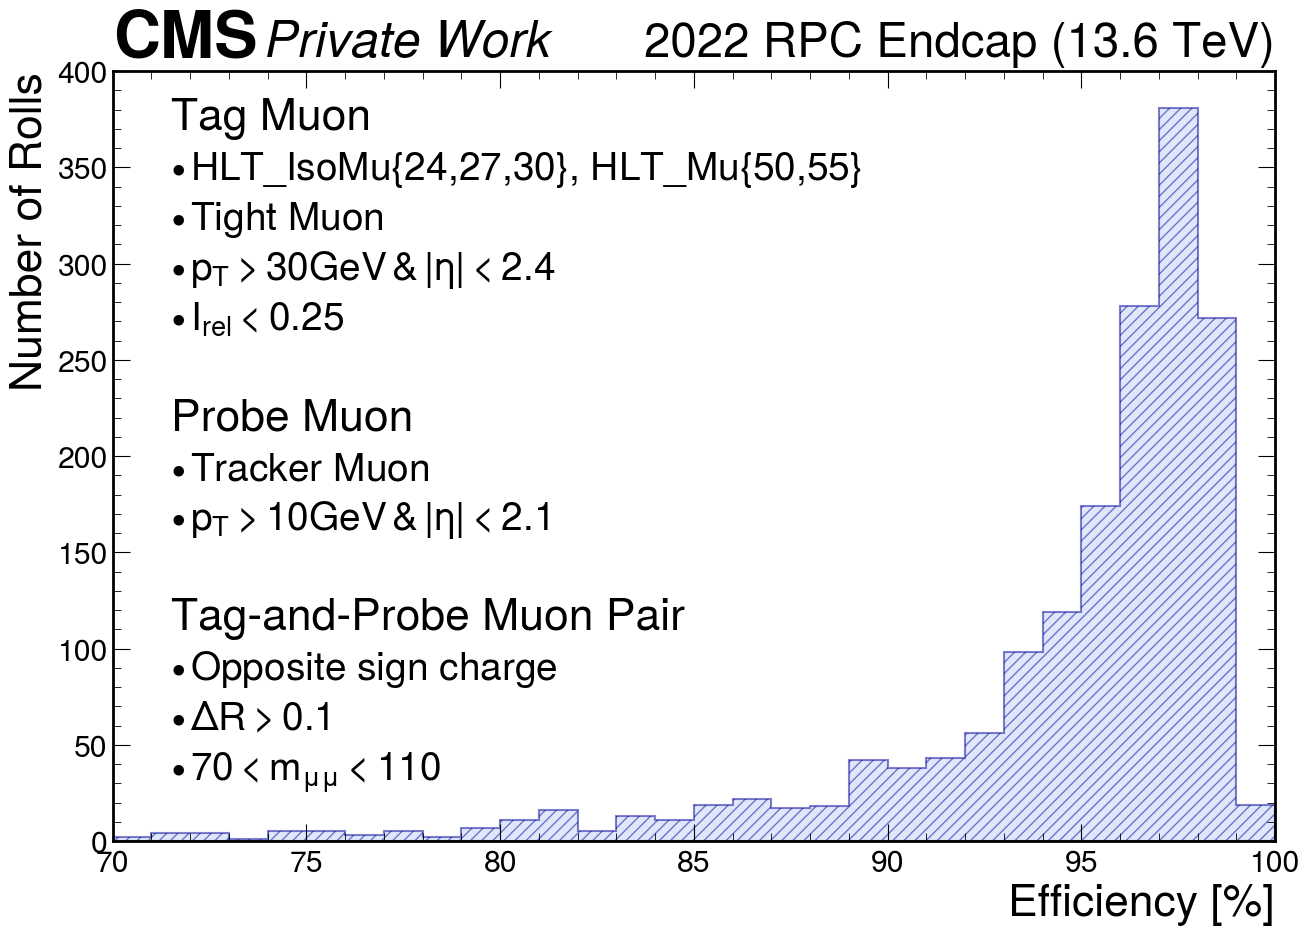

In [59]:
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2022 RPC Endcap", fontsize=36)

ax.set_xlabel('Efficiency [%]', fontsize=32)
ax.set_ylabel('Number of Rolls', fontsize=32)
ax.set_xlim(70, 100)

x = 0.05
y0 = 0.925
dy = 0.065

ax.annotate(r'Tag Muon',                                           xy=(x, y0),         xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$HLT_IsoMu{24,27,30}, HLT_Mu{50,55}',     xy=(x, y0 - dy),    xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,$Tight Muon',                             xy=(x, y0 - 2*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>30GeV\,&\,|\eta|<2.4$',               xy=(x, y0 - 3*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,I_{rel}<0.25$',                           xy=(x, y0 - 4*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Probe Muon',                                         xy=(x, y0 - 6*dy),  xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Tracker Muon',                           xy=(x, y0 - 7*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>10GeV\,&\,|\eta|<2.1$',               xy=(x, y0 - 8*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Tag-and-Probe Muon Pair',                            xy=(x, y0 - 10*dy), xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Opposite sign charge',                   xy=(x, y0 - 11*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,{\Delta}R>0.1$',                          xy=(x, y0 - 12*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,70 < m_{\mu\mu} < 110$',                  xy=(x, y0 - 13*dy), xycoords='axes fraction', fontsize=28)

path_tnp = 'data/Run2023.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "endcap"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#bed2f7"
edgecolor = "#000099"

h_eff[70j::10j].plot(
    ax = ax, yerr = False, histtype="fill",
    facecolor=facecolor, edgecolor=edgecolor,
    linewidth=1.5, alpha=0.5,
    flow=None, hatch="///"
)

ax.legend(fontsize="26")
fig.savefig("./plot/2022_endcap.pdf")
fig.savefig("./plot/2022_endcap.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


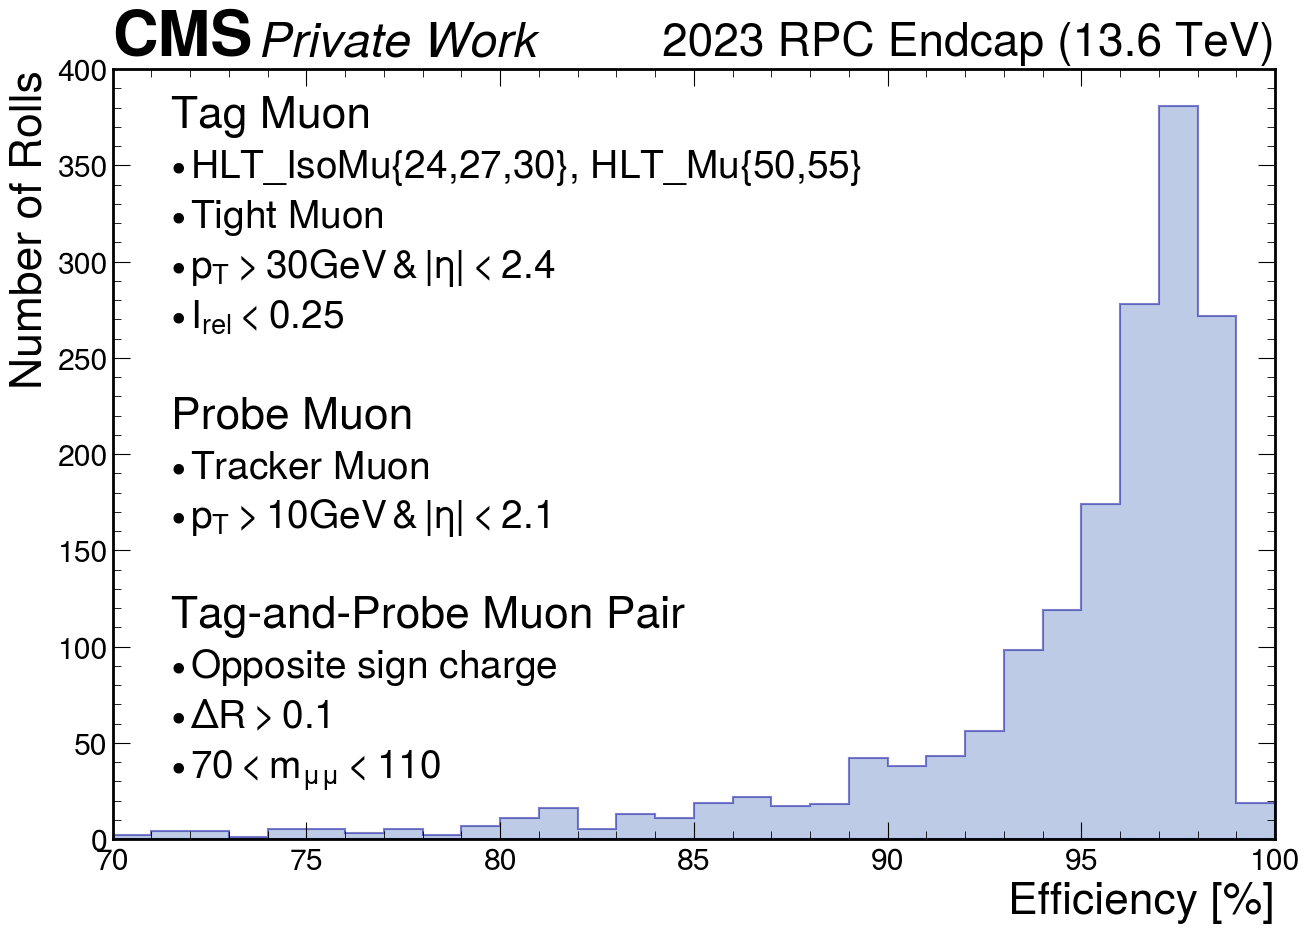

In [60]:
mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2023 RPC Endcap", fontsize=35)

ax.set_xlabel('Efficiency [%]', fontsize=32)
ax.set_ylabel('Number of Rolls', fontsize=32)
ax.set_xlim(70, 100)

x = 0.05
y0 = 0.925
dy = 0.065

ax.annotate(r'Tag Muon',                                           xy=(x, y0),         xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$HLT_IsoMu{24,27,30}, HLT_Mu{50,55}',     xy=(x, y0 - dy),    xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,$Tight Muon',                             xy=(x, y0 - 2*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>30GeV\,&\,|\eta|<2.4$',               xy=(x, y0 - 3*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,I_{rel}<0.25$',                           xy=(x, y0 - 4*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Probe Muon',                                         xy=(x, y0 - 6*dy),  xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Tracker Muon',                           xy=(x, y0 - 7*dy),  xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,p_T>10GeV\,&\,|\eta|<2.1$',               xy=(x, y0 - 8*dy),  xycoords='axes fraction', fontsize=28)

ax.annotate(r'Tag-and-Probe Muon Pair',                            xy=(x, y0 - 10*dy), xycoords='axes fraction', fontsize=32)
ax.annotate(r'$\bullet \,$Opposite sign charge',                   xy=(x, y0 - 11*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,{\Delta}R>0.1$',                          xy=(x, y0 - 12*dy), xycoords='axes fraction', fontsize=28)
ax.annotate(r'$\bullet \,70 < m_{\mu\mu} < 110$',                  xy=(x, y0 - 13*dy), xycoords='axes fraction', fontsize=28)

path_tnp = 'data/Run2023.root'
path_geom = 'geometry/run3.csv'
path_roll_blacklist = 'blacklist/roll-blacklist.json'
where = "endcap"

eff = get_eff(path_tnp, path_geom, path_roll_blacklist, where)
h_eff = Hist(Regular(1010, 0, 101))
h_eff.fill(eff)

facecolor = "#7c99d1"
edgecolor = "#000099"

h_eff[70j::10j].plot(
    ax = ax, yerr = False, histtype="fill",
    facecolor=facecolor, edgecolor=edgecolor,
    linewidth=1.5, alpha=0.5,
    flow=None,
)

ax.legend(fontsize="26")
fig.savefig("./plot/2023_endcap.pdf")
fig.savefig("./plot/2023_endcap.png")

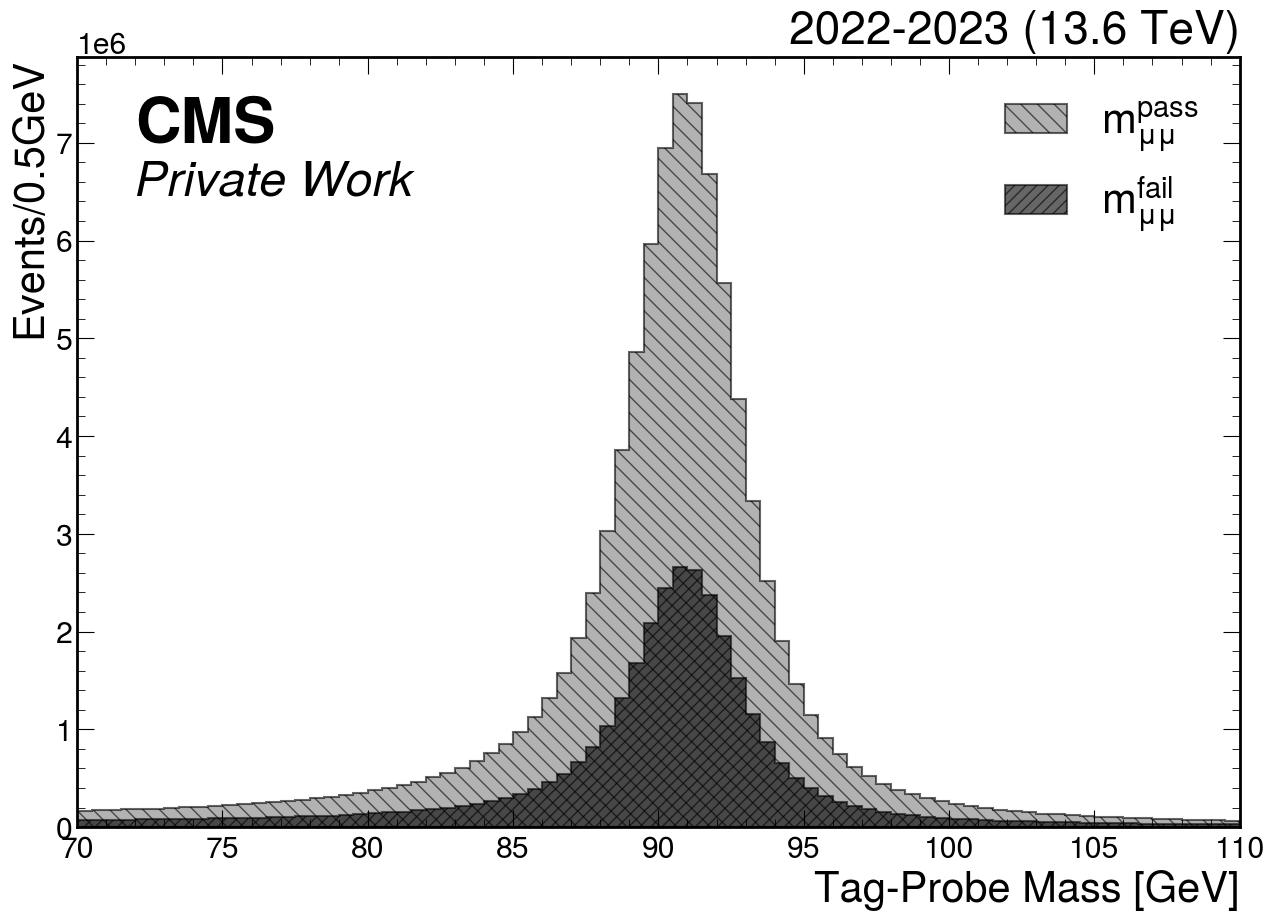

In [61]:
mass_2022 = uproot.open("data/Run2022.root:tree/dimuon_mass").array(library="np")
mass_2023 = uproot.open("data/Run2023.root:tree/dimuon_mass").array(library="np")

is_matched_2022 = uproot.open("data/Run2022.root:tree/is_matched").array(library="np")
is_matched_2023 = uproot.open("data/Run2023.root:tree/is_matched").array(library="np")

pass_mass_2022 = mass_2022[is_matched_2022]
pass_mass_2023 = mass_2023[is_matched_2023]

fail_mass_2022 = mass_2022[~is_matched_2022]
fail_mass_2023 = mass_2023[~is_matched_2023]


mass_run3 = np.concatenate((mass_2022, mass_2023))
matched_mass_run3 = np.concatenate((pass_mass_2022, pass_mass_2023))
unmatched_mass_run3 = np.concatenate((fail_mass_2022, fail_mass_2023))


mh.style.use(mh.styles.CMS)
fig, ax = plt.subplots(figsize=(15, 10))
mh.cms.label(ax=ax, llabel=f'Private Work', com=13.6, year="2022-2023", loc=2, fontsize=35)

ax.set_xlabel('Tag-Probe Mass [GeV]', fontsize=30)
ax.set_ylabel('Events/0.5GeV', fontsize=30)
ax.set_xlim(70, 110)

h_mass_run3 = Hist(Regular(80, 70, 110))
h_matched_mass_run3 = Hist(Regular(80, 70, 110))
h_unmatched_mass_run3 = Hist(Regular(80, 70, 110))

h_mass_run3.fill(mass_run3)
h_matched_mass_run3.fill(matched_mass_run3)
h_unmatched_mass_run3.fill(unmatched_mass_run3)

h_matched_mass_run3.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    edgecolor='black',
    facecolor='gray',
    linewidth=1.5,
    hatch='\\\\',
    flow=None,
    label=r"$m_{\mu\mu}^{pass}$",
    alpha=0.6

)
h_unmatched_mass_run3.plot(
    ax = ax,
    yerr = False,
    histtype="fill",
    edgecolor='black',
    facecolor='black',
    linewidth=1.5,
    hatch='///',
    flow=None,
    label=r"$m_{\mu\mu}^{fail}$",
    alpha=0.6

)


ax.legend(fontsize=30)

fig.savefig("plot/run3_mass_hist.pdf")
fig.savefig("plot/run3_mass_hist.png")